<a href="https://colab.research.google.com/github/anxosanchez/cheel/blob/main/Diagrama_Txy_NIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
AC1 = [4.01814,1203.835,-53.226]
AC2 = [4.08245,1346.382,-53.508]	

In [3]:
# composición inicial zi
z = np.linspace(0,1,num=11)

In [4]:
def Psat1(T):
  return 10 ** ( AC1[0] - AC1[1] / ( T + AC1[2] ) )

def Psat2(T):
  return 10 ** ( AC2[0] - AC2[1] / ( T + AC2[2] ) )   

In [5]:
y = z
P = 1.5 # bar
from scipy.optimize import fsolve

In [6]:
def fun1(T):
  return P - 10 ** ( AC1[0] - AC1[1] / ( T + AC1[2] ) )

Tinf = fsolve(fun1,350)

In [7]:
def fun2(T):
  return P - 10 ** ( AC2[0] - AC2[1] / ( T + AC2[2] ) )

Tsup = fsolve(fun2,373)

In [8]:
print('A temperatura á que ferve o compoñente 1 á presión de {} Pa é de {:5.2f} K ou {:6.2f} ºC.'.format(P,Tinf[0],Tinf[0] - 273.15))
print('A temperatura á que ferve o compoñente 2 á presión de {} Pa é de {:5.2f} K ou {:6.2f} ºC.'.format(P,Tsup[0],Tsup[0] - 273.15))

A temperatura á que ferve o compoñente 1 á presión de 1.5 Pa é de 366.56 K ou  93.41 ºC.
A temperatura á que ferve o compoñente 2 á presión de 1.5 Pa é de 398.17 K ou 125.02 ºC.


In [9]:
T = np.linspace(Tinf,Tsup)

In [10]:
x = ( P - Psat2(T) ) / ( Psat1(T) - Psat2(T) )

In [11]:
y = x * Psat1(T) / P

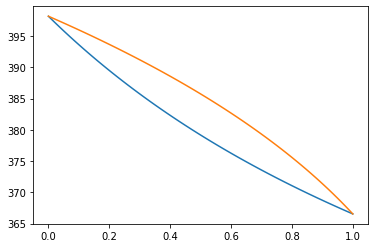

In [12]:
plt.plot(x,T,y,T)

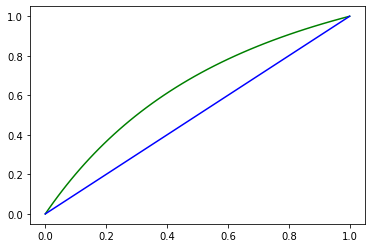

In [13]:
plt.plot(x,y,'g',x,x,'b')